Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,932 (476.30 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
ผลทำนายจากโมเดลที่โหลดมา: Dress


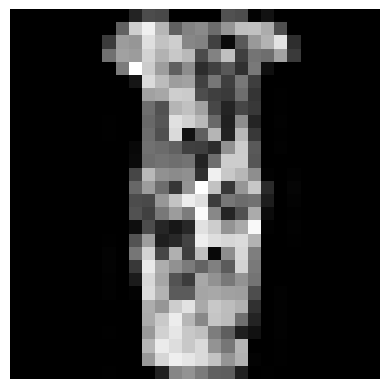

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. โหลดโมเดลกลับมา (ไม่ต้องสร้าง Layer ใหม่, ไม่ต้องเทรน!)
loaded_model = tf.keras.models.load_model('my_fashion_model.h5')

# เช็คว่าสมองยังอยู่ครบมั้ย
loaded_model.summary()

# 2. เตรียมข้อมูลทดสอบ (ต้องโหลด Fashion MNIST อีกรอบเพราะเราอยู่ไฟล์ใหม่)
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (x_test, y_test) = fashion_mnist.load_data()
x_test = x_test / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 3. ลองให้โมเดลที่โหลดมาทำนายดู
sample_image = x_test[100].reshape(1, 28, 28, 1) # ลองรูปใบที่ 100
prediction = loaded_model.predict(sample_image)

# ชื่อคลาส
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"ผลทำนายจากโมเดลที่โหลดมา: {class_names[np.argmax(prediction)]}")

# แสดงรูปเฉลย
plt.imshow(x_test[100], cmap='gray')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
AI ทายรูปวาดของคุณว่า: Pullover


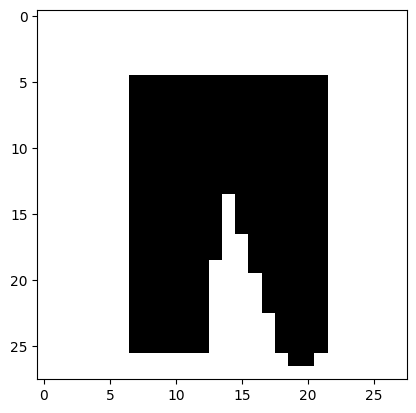

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. โหลดรูปเรา ปรับขนาดให้เป็น 28x28 และเป็นขาวดำ (grayscale)
img = load_img('my_drawing.png', target_size=(28, 28), color_mode='grayscale')

# 2. แปลงเป็น Array และกลับสี (เพราะ AI เทรนมาแบบ พื้นดำ-เส้นขาว แต่ Paint คือ พื้นขาว-เส้นดำ)
img_array = img_to_array(img)
img_array = 255.0 - img_array # กลับสี Invert
img_array = img_array / 255.0   # Normalize

# 3. Predict
result = loaded_model.predict(img_array.reshape(1, 28, 28, 1))
print(f"AI ทายรูปวาดของคุณว่า: {class_names[np.argmax(result)]}")
plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.show()